# Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import random
import gc
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
TRAIN_DIR_PATH = "data_augmentation/Train"
TEST_DIR_PATH = "data_augmentation/Test"

In [6]:
training_data_size = []
training_labels = []
print("[INFO] Analysing training data...\n")
for target in os.listdir(TRAIN_DIR_PATH):
    training_data_size.append(len(os.listdir(os.path.join(TRAIN_DIR_PATH, target))))
    training_labels.append(target)
    print(f"Target name: {target:<15} | Number of available samples: {len(os.listdir(os.path.join(TRAIN_DIR_PATH, target)))}")

[INFO] Analysing training data...

Target name: Bacterial spot  | Number of available samples: 704
Target name: Black mold      | Number of available samples: 428
Target name: Gray spot       | Number of available samples: 537
Target name: health          | Number of available samples: 678
Target name: Late blight     | Number of available samples: 627
Target name: powdery mildew  | Number of available samples: 1004


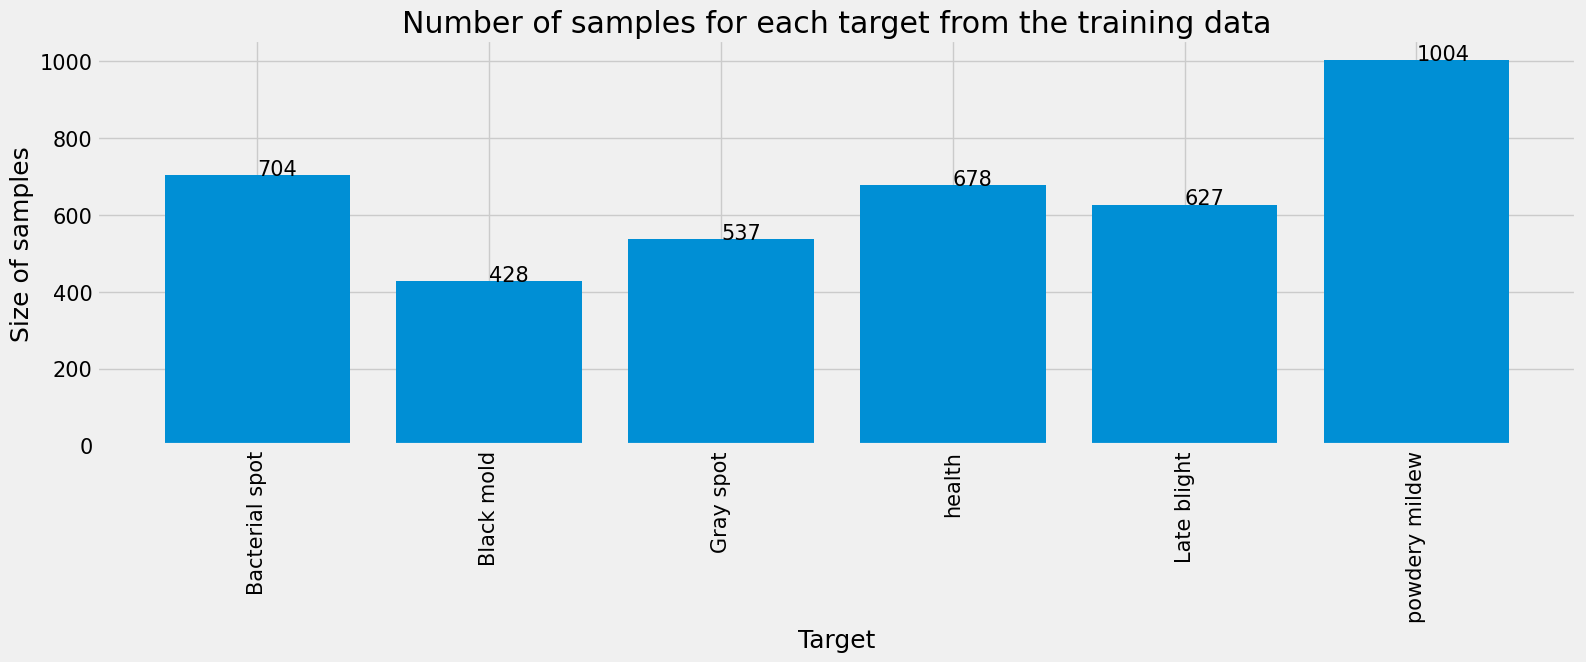

In [7]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(17,5))
    plt.rcParams['font.size']=15
    plt.bar(training_labels, training_data_size)
    plt.xlabel("Target")
    plt.ylabel("Size of samples")
    plt.title("Number of samples for each target from the training data")
    for i in range(len(training_labels)):
        plt.annotate(str(training_data_size[i]), (training_labels[i], training_data_size[i]))
    plt.xticks(rotation=90)
    plt.show()

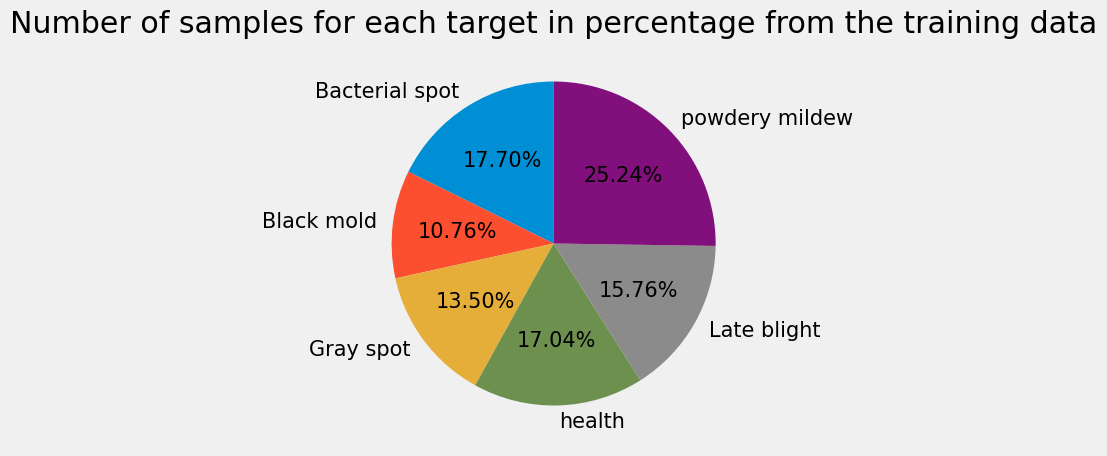

In [8]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(17,5))
    plt.rcParams['font.size']=15
    plt.pie(labels=training_labels, x=training_data_size, startangle=90, autopct="%.2f%%")
    plt.title("Number of samples for each target in percentage from the training data")
    plt.show()

In [9]:
testing_data_size = []
testing_labels = []
print("[INFO] Analysing testing data...\n")
for target in os.listdir(TEST_DIR_PATH):
    testing_data_size.append(len(os.listdir(os.path.join(TEST_DIR_PATH, target))))
    testing_labels.append(target)
    print(f"Target name: {target:<15} | Number of available samples: {len(os.listdir(os.path.join(TEST_DIR_PATH, target)))}")

[INFO] Analysing testing data...

Target name: Bacterial spot  | Number of available samples: 176
Target name: Black mold      | Number of available samples: 108
Target name: Gray spot       | Number of available samples: 135
Target name: health          | Number of available samples: 170
Target name: Late blight     | Number of available samples: 157
Target name: powdery mildew  | Number of available samples: 252


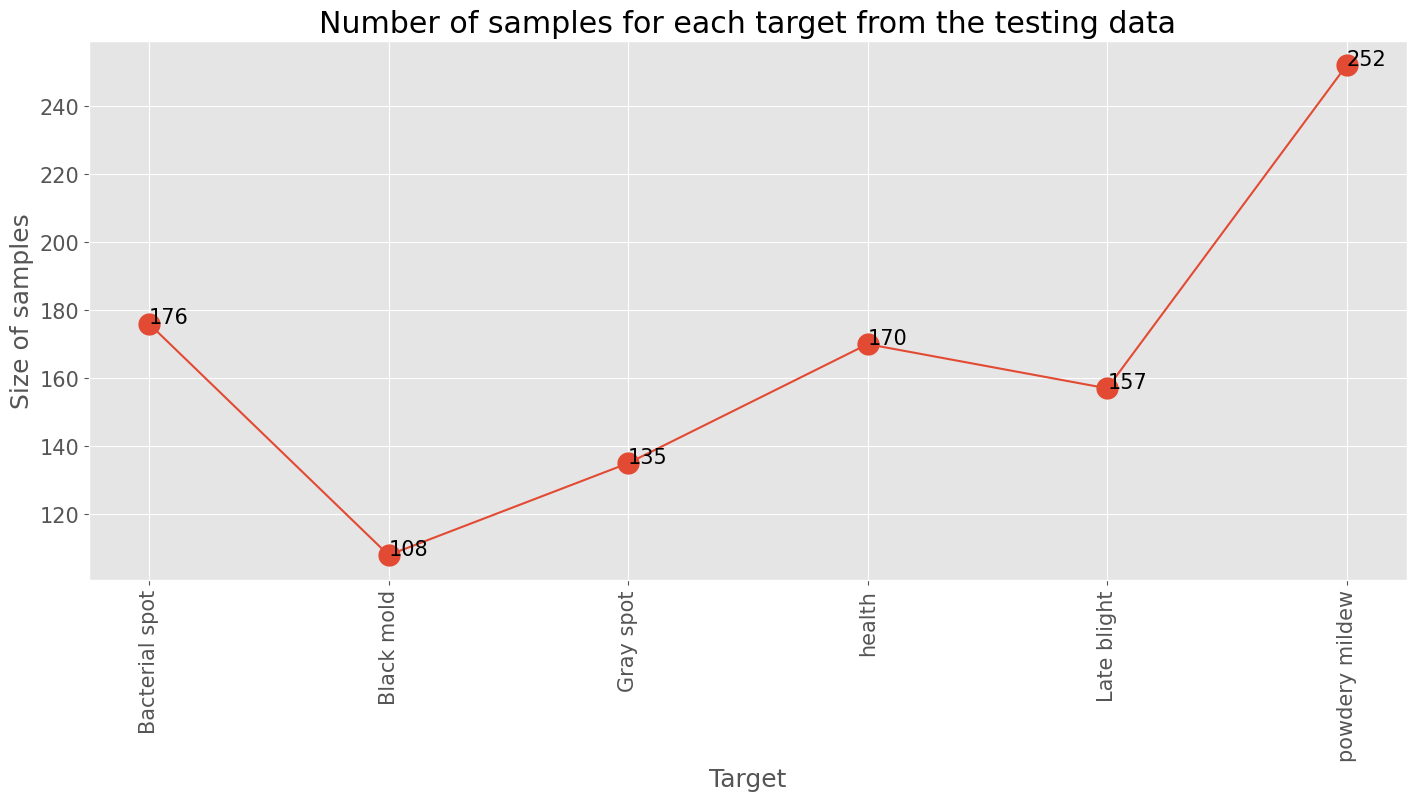

In [10]:
with plt.style.context(style="ggplot"):
    plt.figure(figsize=(17,7))
    plt.rcParams['font.size']=15
    plt.plot(testing_labels, testing_data_size, marker='o', markersize=15)
    plt.xlabel("Target")
    plt.ylabel("Size of samples")
    plt.title("Number of samples for each target from the testing data")
    for i in range(len(testing_labels)):
        plt.annotate(str(testing_data_size[i]), (testing_labels[i], testing_data_size[i]))
    plt.xticks(rotation=90)
    plt.show()

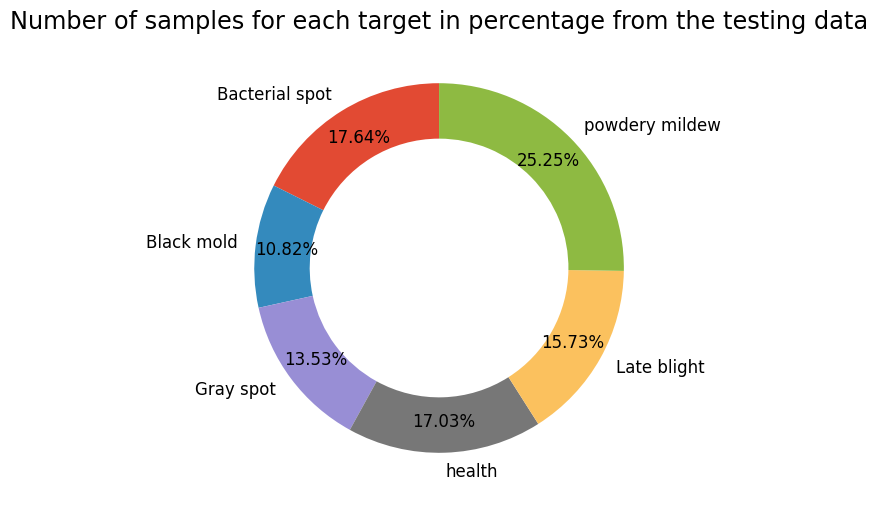

In [11]:
with plt.style.context(style="ggplot"):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.size'] = 12
    plt.pie(testing_data_size,
            labels=testing_labels,
            autopct="%.2f%%",
            startangle=90,
            wedgeprops=dict(width=0.3),
           pctdistance=0.83)
    center_circle = plt.Circle((0, 0), 0.1, color='white', fc='white', linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title("Number of samples for each target in percentage from the testing data")
    plt.show()

In [12]:
IMAGE_SIZE = (128, 128)
class_labels = os.listdir(TRAIN_DIR_PATH)
class_labels.sort()

print(class_labels)

['Bacterial spot', 'Black mold', 'Gray spot', 'Late blight', 'health', 'powdery mildew']


## Loading training samples

In [13]:
training_data = []
training_data_labels = []

for idx, target in enumerate(class_labels):
    print(f"[INFO] Loading images from the target {target}...")
    images_names = os.listdir(os.path.join(TRAIN_DIR_PATH, target))
    for image_name in tqdm(images_names):
        filepath = os.path.join(TRAIN_DIR_PATH, target, image_name)
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_CUBIC)
        image = image.astype(np.float32)
        image = image / 255.0
        training_data.append(image)
        training_data_labels.append(idx)

[INFO] Loading images from the target Bacterial spot...


100%|███████████████████████████████████████████████████████████████████████████████| 704/704 [00:06<00:00, 103.16it/s]


[INFO] Loading images from the target Black mold...


100%|███████████████████████████████████████████████████████████████████████████████| 428/428 [00:03<00:00, 126.50it/s]


[INFO] Loading images from the target Gray spot...


100%|███████████████████████████████████████████████████████████████████████████████| 537/537 [00:04<00:00, 133.16it/s]


[INFO] Loading images from the target Late blight...


100%|███████████████████████████████████████████████████████████████████████████████| 627/627 [00:04<00:00, 132.44it/s]


[INFO] Loading images from the target health...


100%|███████████████████████████████████████████████████████████████████████████████| 678/678 [00:05<00:00, 125.20it/s]


[INFO] Loading images from the target powdery mildew...


100%|█████████████████████████████████████████████████████████████████████████████| 1004/1004 [00:07<00:00, 125.64it/s]


In [14]:
def show_images(images,labels,str_labels):
    plt.figure(figsize=(15,15))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=random.randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}", fontsize=15)
    plt.tight_layout()
    plt.show()

show_images(training_data, training_data_labels, class_labels)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
testing_data = []
testing_data_labels = []

for idx, target in enumerate(class_labels):
    print(f"[INFO] Loading images from the target {target}...")
    images_names = os.listdir(os.path.join(TEST_DIR_PATH, target))
    for image_name in tqdm(images_names):
        filepath = os.path.join(TEST_DIR_PATH, target, image_name)
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_CUBIC)
        image = image.astype(np.float32)
        image = image / 255.0
        testing_data.append(image)
        testing_data_labels.append(idx)

[INFO] Loading images from the target Bacterial spot...


100%|██████████| 176/176 [00:02<00:00, 60.71it/s] 


[INFO] Loading images from the target Black mold...


100%|██████████| 108/108 [00:02<00:00, 44.70it/s] 


[INFO] Loading images from the target Gray spot...


100%|██████████| 135/135 [00:02<00:00, 57.49it/s] 


[INFO] Loading images from the target Late blight...


100%|██████████| 157/157 [00:02<00:00, 58.06it/s] 


[INFO] Loading images from the target health...


100%|██████████| 170/170 [00:03<00:00, 51.13it/s] 


[INFO] Loading images from the target powdery mildew...


100%|██████████| 252/252 [00:03<00:00, 64.72it/s] 


In [16]:
show_images(testing_data, testing_data_labels, class_labels)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
training_data = np.array(training_data)
training_data_labels = np.array(training_data_labels)

print(training_data.shape, training_data_labels.shape)

(3978, 128, 128, 3) (3978,)


In [18]:
testing_data = np.array(testing_data)
testing_data_labels = np.array(testing_data_labels)

print(testing_data.shape, testing_data_labels.shape)

(998, 128, 128, 3) (998,)


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
training_data_labels = tf.keras.utils.to_categorical(training_data_labels)
testing_data_labels = tf.keras.utils.to_categorical(testing_data_labels)

In [20]:
model = Sequential()

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding="same", kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(units=512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)))
model.add(Dense(units=len(class_labels), activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

In [21]:
EPOCHS = 30

history = model.fit(
    x=training_data,
    y=training_data_labels,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(testing_data, testing_data_labels),
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)
    ]
)

Epoch 1/30
125/125 [==============================] - 17s 47ms/step - loss: 5.9303 - accuracy: 0.3527 - val_loss: 5.7935 - val_accuracy: 0.1573 - lr: 0.0010
Epoch 2/30
125/125 [==============================] - 4s 30ms/step - loss: 4.4193 - accuracy: 0.4075 - val_loss: 4.6748 - val_accuracy: 0.2515 - lr: 0.0010
Epoch 3/30
125/125 [==============================] - 4s 31ms/step - loss: 3.3879 - accuracy: 0.4630 - val_loss: 4.2026 - val_accuracy: 0.2285 - lr: 0.0010
Epoch 4/30
125/125 [==============================] - 4s 31ms/step - loss: 2.7732 - accuracy: 0.4899 - val_loss: 3.7470 - val_accuracy: 0.2956 - lr: 0.0010
Epoch 5/30
125/125 [==============================] - 4s 31ms/step - loss: 2.3787 - accuracy: 0.5053 - val_loss: 2.4586 - val_accuracy: 0.4319 - lr: 0.0010
Epoch 6/30
125/125 [==============================] - 4s 31ms/step - loss: 2.2196 - accuracy: 0.5010 - val_loss: 2.2263 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 7/30
125/125 [==============================] - 4s 30ms/s

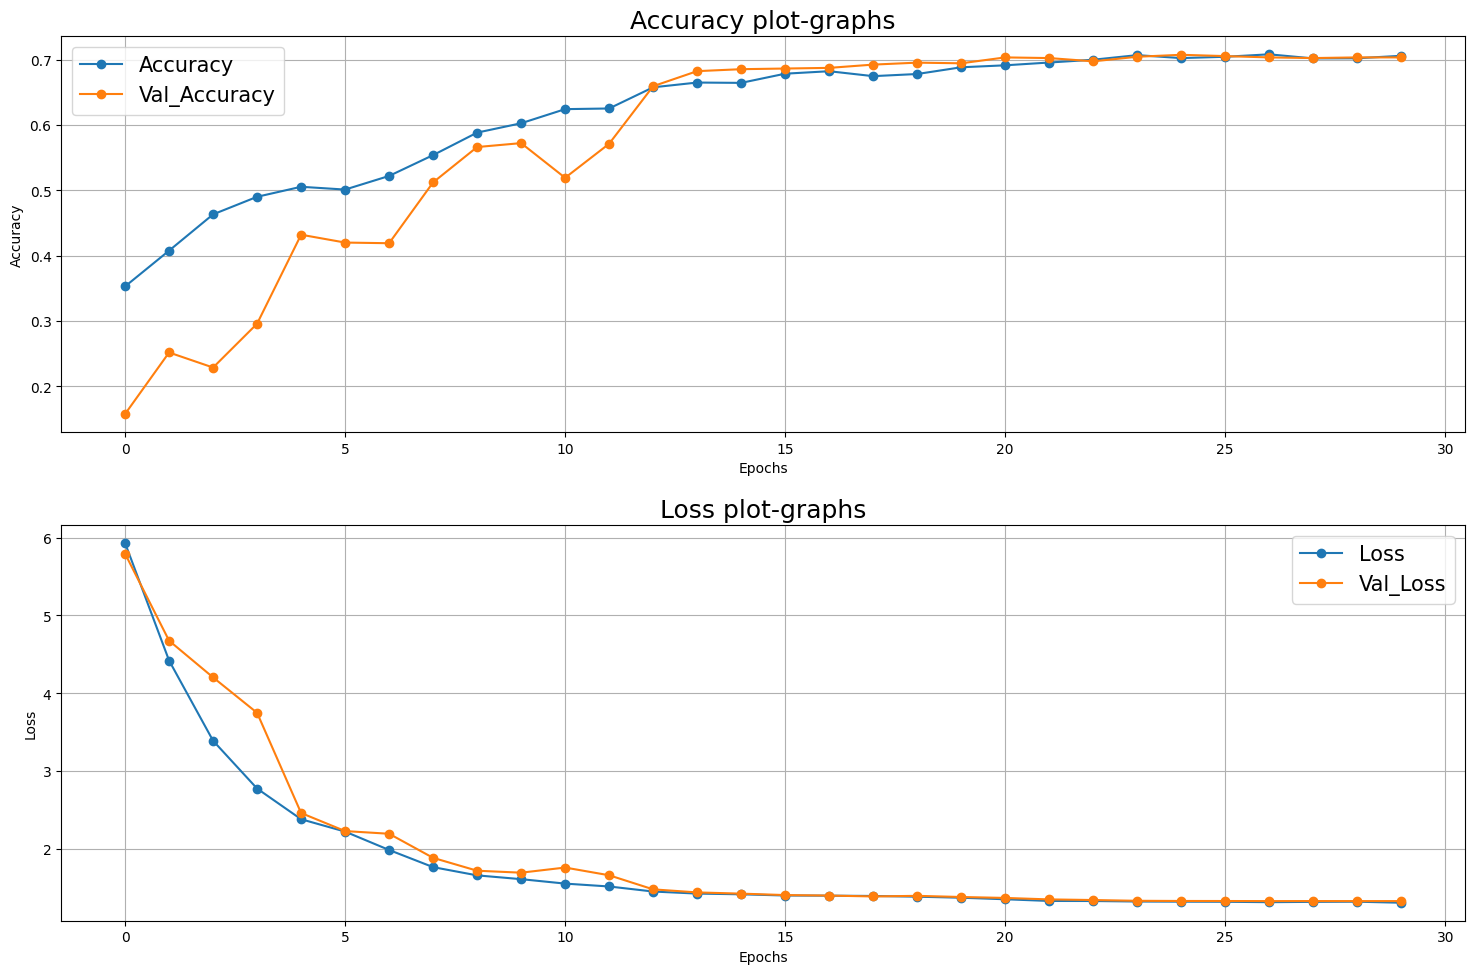

In [22]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
plt.rcParams["font.size"]=15
axes[0].plot(history.history['accuracy'],label='Accuracy',marker='o')
axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy',marker='o')
axes[0].set_title(label='Accuracy plot-graphs')
axes[0].set_xlabel(xlabel='Epochs')
axes[0].set_ylabel(ylabel='Accuracy')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['loss'],label='Loss',marker='o')
axes[1].plot(history.history['val_loss'],label='Val_Loss',marker='o')
axes[1].set_title(label='Loss plot-graphs')
axes[1].set_xlabel(xlabel='Epochs')
axes[1].set_ylabel(ylabel='Loss')
axes[1].legend()
axes[1].grid()
fig.tight_layout()
plt.show()

# Model Prediction

In [23]:
model_probs = model.predict(testing_data, verbose=1)
print(model_probs)

32/32 [==============================] - 0s 8ms/step
[[2.11262584e-01 3.57521058e-04 1.36301473e-01 9.60323960e-02
  5.25599826e-05 5.55993438e-01]
 [3.99061948e-01 1.76502578e-03 3.81404877e-01 2.98090093e-02
  5.96926548e-05 1.87899470e-01]
 [2.54392236e-01 9.39009129e-04 2.85840243e-01 1.28853515e-01
  4.65854013e-04 3.29509169e-01]
 ...
 [1.92951202e-01 7.91276514e-04 1.29214153e-01 1.09317131e-01
  9.86015002e-05 5.67627668e-01]
 [3.91817391e-02 3.07709299e-04 1.07306585e-01 8.95293280e-02
  1.77419875e-04 7.63497233e-01]
 [7.51412734e-02 1.09925750e-03 1.36902079e-01 1.30781367e-01
  1.60801850e-04 6.55915141e-01]]


In [24]:
model_labels=np.argmax(model_probs, axis=1)
print(model_labels.tolist())

[5, 0, 5, 2, 1, 5, 3, 2, 0, 0, 2, 2, 0, 2, 5, 3, 2, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 5, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 5, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 4, 4, 4, 5, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 5, 1, 0, 5, 0, 5, 5, 1, 1, 1, 1, 3, 1, 0, 1, 5, 1, 1, 2, 1, 0, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 5, 2, 0, 3, 2, 2, 3, 2, 5, 3, 2, 5, 0, 1, 5, 1, 0, 0, 3, 2, 3, 2, 3, 2, 2, 2, 5, 2, 5, 5, 2, 5, 2, 5, 2, 5, 2, 5, 5, 2, 3, 0, 5, 0, 3, 5, 0, 

In [25]:
true_labels=np.argmax(testing_data_labels,axis=1)
print(true_labels.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

# Result Analysis

***Accuracy Score***

In [26]:
model_accuracy=accuracy_score(y_true=true_labels, y_pred=model_labels)
print(f"Validation accuracy of ConvolutionalNeuralNetwork model is {model_accuracy*100.0:.2f}%")

Validation accuracy of ConvolutionalNeuralNetwork model is 70.34%


***Classification Report***

In [27]:
print(classification_report(y_true=true_labels, y_pred=model_labels, target_names=class_labels))

                precision    recall  f1-score   support

Bacterial spot       0.65      0.73      0.68       176
    Black mold       0.67      0.69      0.68       108
     Gray spot       0.62      0.38      0.47       135
   Late blight       0.62      0.44      0.51       157
        health       0.93      0.99      0.96       170
powdery mildew       0.67      0.83      0.74       252

      accuracy                           0.70       998
     macro avg       0.69      0.68      0.68       998
  weighted avg       0.70      0.70      0.69       998



***Confusion Matrix***

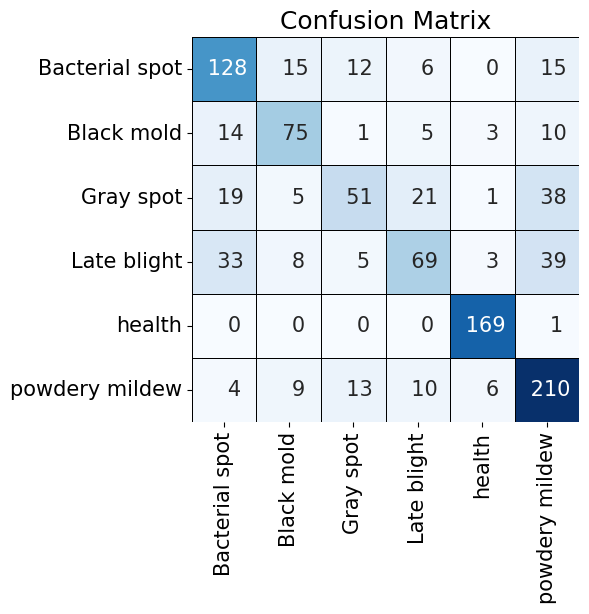

In [28]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=model_labels),
            cmap=plt.cm.Blues,
            annot=True,
            fmt='4d',
            cbar=False,
            linecolor='black',
            linewidths=0.5,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Model Saving

In [29]:
model.save(filepath='models/ConvolutionalNeuralNetwork_model.h5')